In [56]:
import pandas as pd
import numpy as np
import re
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets = pd.read_csv("../data/train.csv")

In [4]:
tweets["text"] = tweets["text"].str.lower()
tweets["text"] = tweets["text"].apply(lambda x: re.sub('(?P<url>https?://[^\s]+)', ' ', x))
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[^\w]', ' ', x))
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'_', ' ', x))
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'[0-9]',' ', x))
tweets["text"] = tweets["text"].apply(lambda x: re.sub(' +',' ', x))
tweets["text"] = tweets["text"].apply(lambda x: unidecode.unidecode(x))
tweets["text"] = tweets["text"].str.strip()
tweets["text_length"] = tweets["text"].str.len()
tweets["text"] = tweets["text"].apply(lambda x: re.sub(r'\b\w{1}\b', '', x))
tweets["words_count"] = tweets["text"].str.split(' ').apply(lambda x: len(x))

In [5]:
tweets.head()

,id,keyword,location,text,target,text_length,words_count
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,68,13
1,4,NaN,NaN,forest fire near la ronge sask canada,1,37,7
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,130,22
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,56,7
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,85,16


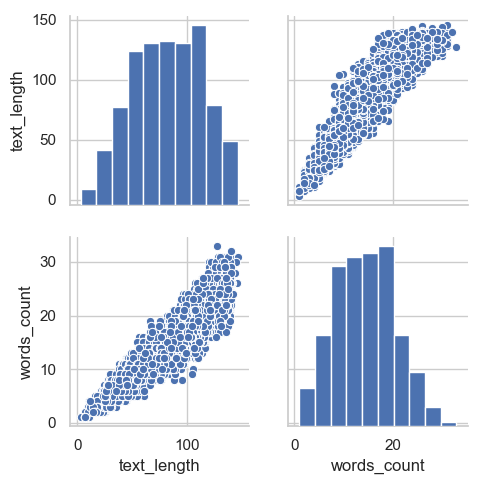

In [15]:
sns.pairplot(tweets, vars=["text_length","words_count"])

In [36]:
X = tweets[["text_length","words_count"]]
y = tweets["target"]

# Creamos un split de datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6090, 2)
(1523, 2)
(6090,)
(1523,)


In [38]:
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = model.predict(X_train)  
y_test_hat = model.predict(X_test)
#Calculamos el error
print("Error de entrenamiento: %f" % (model.score(X_train,y_train))) 
print("Error de test: %f" % (model.score(X_test,y_test)))
#print(clf.score(y_train, y_train_hat))

Error de entrenamiento: 0.606568
Error de test: 0.619173


In [47]:
#Ahora usemos Cross-Validation
X = tweets[["text_length","words_count"]]
y = tweets["target"]

model = LogisticRegression(solver='lbfgs')
model.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

kfold = KFold(9, False, 100)
cv_resultados = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(cv_resultados.mean())

# data = tweets[["words_count","text_length","target"]]

# score_train_avg = 0
# score_test_avg = 0

# for train, test in kfold.split(data):
#     # Preparamos los datos
#     X_train = data.iloc[train][["words_count","text_length"]]
#     y_train = data.iloc[train]["target"]
#     X_test = data.iloc[test][["words_count","text_length"]]
#     y_test = data.iloc[test]["target"]
#     # Creamos y entrenamos el modelo
#     clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
#     # Realizamos las predicciones
#     y_train_hat = clf.predict(X_train)
#     y_test_hat = clf.predict(X_test)
#     # Calculamos los errores
#     score_train = clf.score(y_train,y_train_hat)
#     score_test = clf.score(y_test,y_test_hat)
#     print("El score de train es {:.3f}, el score de test es {:.3f}".format(score_train, score_test))
#     # Acumulamos los errores para calcular el promedio
#     score_train_avg += score_train
#     score_test_avg += score_test

0.606561074547667


In [53]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
print("Entrenamiento: %f " % (accuracy_score(y_train, y_train_hat)))
print("Test: %f" % (accuracy_score(y_test, y_test_hat)))

Entrenamiento: 0.607882 
Test: 0.617203


In [55]:
print(confusion_matrix(y_test, y_test_hat))

[[706 165]
 [418 234]]


In [58]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       871
           1       0.59      0.36      0.45       652

   micro avg       0.62      0.62      0.62      1523
   macro avg       0.61      0.58      0.58      1523
weighted avg       0.61      0.62      0.60      1523

